<a href="https://colab.research.google.com/github/ItsFatimaAnam/ItsFatimaAnam/blob/main/ANN_on_SeattleWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Add your Python code here!
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [ ]:
df= pd.read_csv('seattleWeather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


<AxesSubplot:>

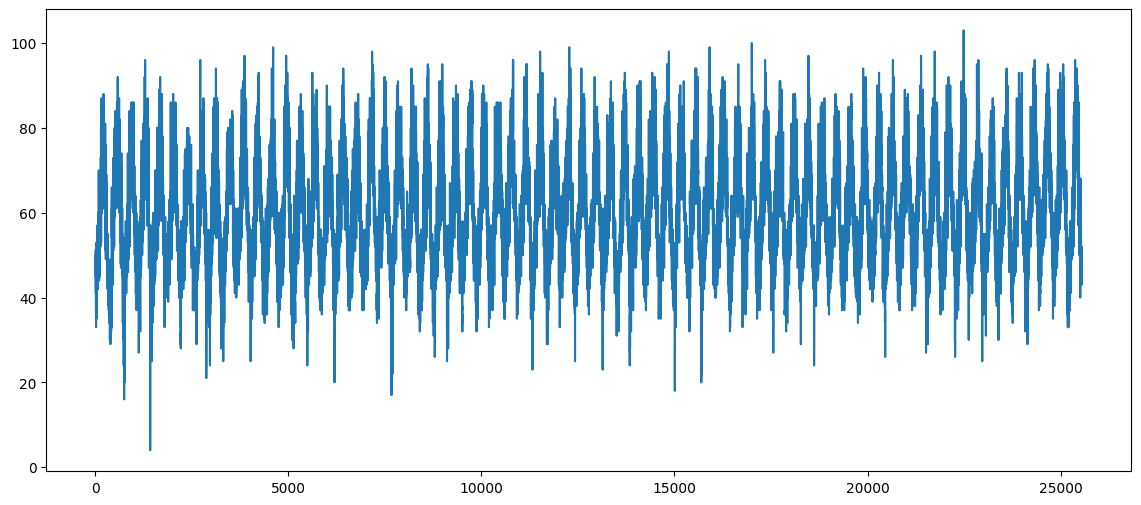

In [ ]:
plt.figure(figsize=(14,6))
df['TMAX'].plot()

<AxesSubplot:xlabel='RAIN', ylabel='TMAX'>

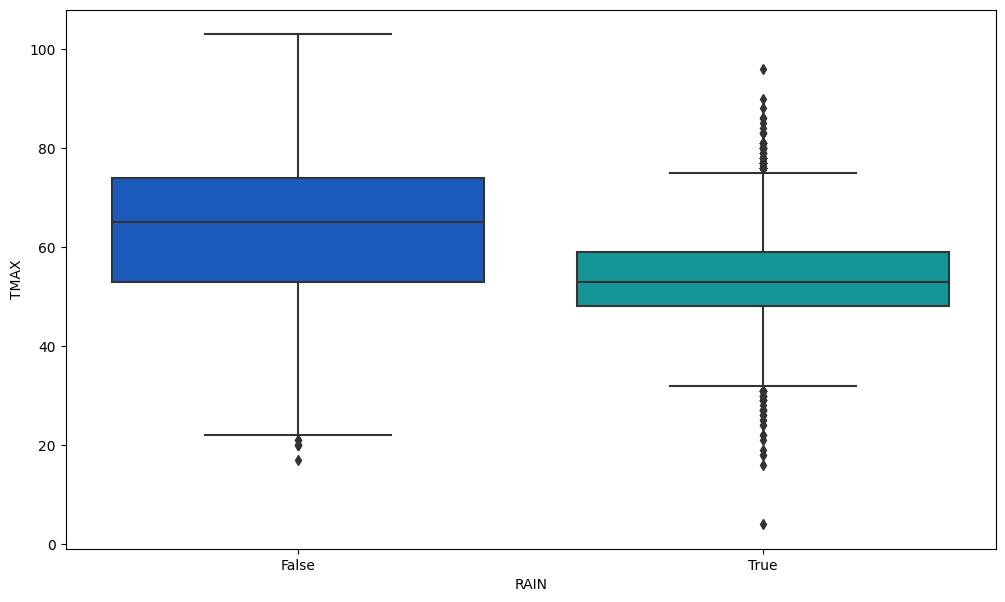

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='RAIN',y='TMAX',data=df,palette='winter')

<AxesSubplot:ylabel='Frequency'>

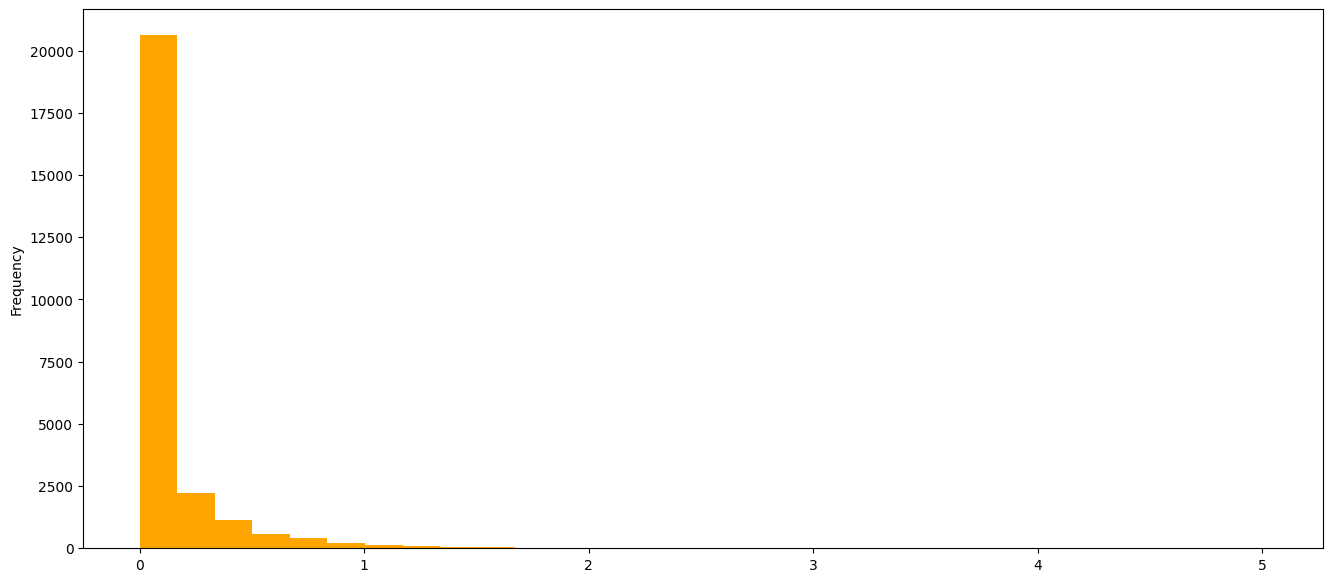

In [ ]:
df['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

In [ ]:
#We are going to convert rain column to numeric for ann
df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
 5   rain    25551 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
X=df[['PRCP', 'TMAX', 'TMIN']]
y=df[['rain']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=41)

In [ ]:
#We 'll make normalization to X values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
#creating ANN Model
import keras 
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann  = Sequential()
ann.add(Dense(units= 32, activation = 'relu'))
ann.add(Dense(units= 16, activation = 'relu'))
ann.add(Dense(units= 1, activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode= 'min', verbose= 1, patience=15)

In [ ]:
ann.fit(xtrain, ytrain, epochs = 10, batch_size=10, callbacks=[early_stop])

Epoch 1/10
2044/2044 [==============================] - 3s 1ms/step - loss: 0.0506 - accuracy: 0.9397
Epoch 2/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0120 - accuracy: 0.9893
Epoch 3/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 4/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 5/10
2044/2044 [==============================] - 2s 1ms/step - loss: 5.5124e-04 - accuracy: 0.9997
Epoch 6/10
2044/2044 [==============================] - 2s 1ms/step - loss: 1.0137e-04 - accuracy: 1.0000
Epoch 7/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9982
Epoch 8/10
2044/2044 [==============================] - 2s 1ms/step - loss: 6.6679e-05 - accuracy: 1.0000
Epoch 9/10
2044/2044 [==============================] - 2s 1ms/step - loss: 1.5484e-05 - accuracy: 1.0000
Epoch 10/10
2044/2044 [==============================] - 2s 1ms/st

In [ ]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

160/160 [==============================] - 0s 787us/step
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[2928    0]
 [   0 2182]]
